In [1]:
from src.class_polygon import Polygon
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from src.greedy_alg.class_pallets import Pallets
from src.class_item import Item

from copy import copy


from src.class_packing import Packing
from src.smth2lines.polygon2segments import polygon2segments

h = 0.4

points_1 = np.array([[0.58926808, 0.82554894],
 [0.,         0.79957281],
 [0.47827989, 0.36675047],
 [0.37141829, 0.        ],
 [0.75175641, 0.05664668],
 [0.95640232, 0.11052855],
 [1.14280225, 0.18556183],
 [1.58117,   0.34681621],
 [1.28802218, 0.63747178],
 [0.97332752, 0.61417636],
 [0.83930078, 1.13645914]])
points_2 = np.array([[3.01979822, 2.07025999],
 [2.73305743, 1.40585017],
 [1.96521414, 1.48349362],
 [1.4258782,  0.83554282],
 [1.7142081,  0.02687157],
 [2.64006002, 0.10048232],
 [3.18140955, 0.08416952],
 [3.91775227, 0.        ],
 [4.05815576, 0.74132842],
 [3.80823739, 1.28051197],
 [3.77836706, 2.10301042]])
points_3 = np.array([[4.47245017, 0.64193153],
 [4.36033045, 0.29639881],
 [4.61709623, 0.14835729],
 [4.93464073, 0.        ],
 [5.09478795, 0.35545135],
 [5.83320232, 0.23552848],
 [5.60724152, 0.74163422],
 [5.49637574, 1.09712479],
 [5.27505259, 1.36176241],
 [4.95925593, 1.44778698],
 [4.70553081, 1.14597412],
 [4.47159612, 1.17799969],
 [4.12091693, 1.12014556],
 [4.05815576, 0.8111184 ]])
points_4 = np.array([[6.14400618, 0.55002146],
 [6.4439746,  0.32950471],
 [6.78549594, 0.03210842],
 [7.34200891, 0.        ],
 [7.4987618,  0.53949475],
 [7.69272628, 1.02659783],
 [7.74826833, 1.78236417],
 [6.83573843, 1.17035837],
 [6.57750562, 1.45971592],
 [5.77437183, 1.68831751],
 [5.60724152, 0.98909752]])
points_5 = np.array([[5.2222155,  2.83143304],
 [3.18669633, 3.72914302],
 [1.90982314, 1.86197557],
 [3.8455557,  1.2       ]])
points_6 = np.array([[8.44222416, 0.34435145],
 [8.79719579, 0.47157979],
 [9.26160975, 0.        ],
 [9.69847081, 0.2958785 ],
 [9.32623779, 0.89897369],
 [9.84880988, 1.29880309],
 [9.45429884, 1.61936394],
 [8.98844578, 1.46498817],
 [8.63511005, 2.05304967],
 [8.33400149, 1.61707586],
 [8.20145922, 1.275845  ],
 [7.70546979, 0.92331586],
 [8.41307863, 0.73233859]])
points_7 = np.array([[0.15768241, 1.58186696],
 [0.,        1.26391856],
 [0.3695445,  1.2       ],
 [1.0803024,  1.36436947],
 [0.47897582, 1.83433517]])

polygons = [copy(points_1), copy(points_2), copy(points_3), copy(points_4), copy(points_5), copy(points_6), copy(points_7)]

packing = Packing(width=10, height=10, drill_radius=0)

pallets = Pallets([10, 10])
pallets.grid_step = h
pallets.add_pallet_lines()

print(pallets.pallet_lines)

[[[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]]]


In [2]:
packing.items = np.full(len(polygons), None)

for id in range(len(polygons)):
    item = Item(id, polygons[id])
    packing.items[id] = item
    item.rotation = 0

packing.pallets = pallets
packing.h = h
packing.add_segments_for_items()

print(packing.items)

In [3]:
packing.set_squares()

for item in packing.items:
    print(item.id)

packing.sort_items(num_sort=2)

for item in packing.items:
    print(item.id)

0
1
2
3
4
5
6
1
4
5
3
2
0
6


In [4]:
def pack_item(item, pallets, t_vector, r, rotation):
    item.t_vector = [t_vector, r]
    item.packed = True
    item.best_rotation = rotation
    for s in range(len(item.segments[rotation])):
        for l in range(len(item.segments[rotation][s])):
            new_line = [copy(item.segments[rotation][s][l][0]) + copy(item.t_vector[0]), copy(item.segments[rotation][s][l][1]) + copy(item.t_vector[0])]
            pallets.pallet_lines[r+s].append(copy(new_line))
        pallets.pallet_lines[r+s].sort(key=lambda x: int(x[0]), reverse=False)

    def first_elem(e):
      return e[0]

    for line in pallets.pallet_lines:
        for segment in line:
            segment.sort()
        line.sort(key=first_elem)
        i = 0
        while i < (len(line) - 1):
            if line[i][1] == line[i+1][0]:
                line[i][1] = line[i+1][1]
                line.pop(i+1)
                continue
            if line[i][1] > line[i+1][0]:
                if line[i][1] < line[i+1][1]:
                    line[i][1] = line[i+1][1]
                    line.pop(i+1)
                    continue
                elif line[i][1] >= line[i+1][1]:
                    line.pop(i+1)
                    continue
            i+=1

def pack_segments(items, pallets):
    for item in items:
        best_height = 10000
        best_t_vector = None
        best_rotation = None
        best_r = None
        for rotation in range(item.rotation + 1):
            segments = item.segments[rotation]
            r = 0
            finish_flag = 0
            while r < len(pallets.pallet_lines) and item.packed == False and finish_flag == 0:
                row = pallets.pallet_lines[r]
                k = 1
                ex_flag = 0
                while k < len(row) and item.packed == False and ex_flag == 0:
                    t_vector = row[k-1][1] - segments[0][0][0]
                    i = 0
                    # l = len(segments[0])
                    while i < len(segments) and r + i < len(pallets.pallet_lines) and ex_flag == 0:
                            j = 0
                            while j < len(segments[i]) and ex_flag == 0:
                                m = 0
                                while m < len(pallets.pallet_lines[r+i]) and ex_flag == 0:
                                    # случаи пересечения линии и упаковки
                                    if segments[i][j][1] + t_vector > pallets.shape[0]:
                                        ex_flag = 1
                                    elif pallets.pallet_lines[r+i][m][0] <= segments[i][j][0] + t_vector < pallets.pallet_lines[r+i][m][1] and segments[i][j][0] + t_vector != segments[i][j][1] + t_vector:
                                        t_vector = pallets.pallet_lines[r+i][m][1]
                                        i = 0
                                        j = 0
                                    elif pallets.pallet_lines[r+i][m][0] < segments[i][j][1] + t_vector <= pallets.pallet_lines[r+i][m][1] and segments[i][j][0] + t_vector != segments[i][j][1] + t_vector:
                                        t_vector = pallets.pallet_lines[r+i][m][1]
                                        i = 0
                                        j = 0
                                    elif segments[i][j][0] + t_vector < pallets.pallet_lines[r + i][m][0] and \
                                            pallets.pallet_lines[r + i][m][1] < segments[i][j][1] + t_vector:
                                        t_vector = pallets.pallet_lines[r + i][m][1]
                                        i = 0
                                        j = 0
                                    elif segments[i][j][0] + t_vector < 0:
                                        t_vector = - segments[i][j][0]
                                        i = 0
                                        j = 0

                                    m += 1
                                j += 1
                            i += 1
                    # если объект влезает, добавляем его на палету
                    if ex_flag == 0:
                        # pack_item(item, pallets, t_vector, r)
                        if best_height > r :
                            best_height = copy(r)
                            best_r = copy(r)
                            best_t_vector = copy(t_vector)
                            best_rotation = copy(rotation)
                        finish_flag = 1
                        ex_flag = 1
                    k += 1
                r += 1
        pack_item(item, pallets, best_t_vector, best_r, best_rotation)

pack_segments(packing.items, packing.pallets)
for line in pallets.pallet_lines:
    print(line)

[[0, 0], [0.2883298999999999, 2.4918740699999997], [4.568010119999999, 4.568010119999999], [4.9055439975779604, 5.98584639757796], [6.3173661227338815, 6.3173661227338815], [7.136751712733881, 7.573612772733881], [8.56068492273388, 9.45871923273388], [10, 10]]
[[0, 0], [0.1552918045946581, 5.98584639757796], [6.288220592733881, 7.573612772733881], [8.260716502733882, 9.61547212273388], [10, 10]]
[[0, 5.243077875155921], [5.38451981757796, 5.38451981757796], [5.580611752733882, 7.262466752166332], [7.7239518427338805, 9.80943660273388], [10, 10]]
[[0, 2.4196775026745776], [3.0002086581090803, 8.925995524166385], [8.952448752733881, 9.822180107553438], [10, 10]]
[[0, 0], [0.53933594, 2.38235919], [3.273750956631904, 5.944669919999999], [6.0766011827338815, 7.7239518427338805], [7.869972154398838, 8.69421594273388], [9.593064958756335, 9.864978652733882], [10, 10]]
[[0, 0], [1.563597763417471, 2.356229846063667], [3.5472932551547283, 5.944669919999999], [6.209143452733882, 6.5421268147328

[0, 0]
[2.63227756, 0]
[5.580611752733882, 0]
[7.7239518427338805, 0]
[7.891082152733881, 5]
[4.201977051075202, 6]
[4.9055439975779604, 0]


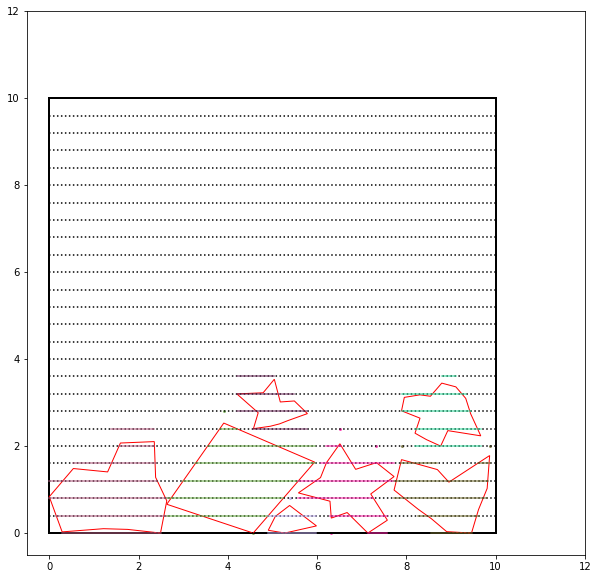

In [5]:
import random
from matplotlib import pyplot as plt, patches

pallet_width = 10
pallet_height = 10

fig, ax = plt.subplots()

MAX_SIZE = 10
if pallet_width > pallet_height:
    fig.set_figheight(MAX_SIZE)
    fig.set_figwidth(
        MAX_SIZE * pallet_width/pallet_height)
else:
    fig.set_figheight(
        MAX_SIZE * pallet_height/pallet_width)
    fig.set_figwidth(MAX_SIZE)

pallet = patches.Rectangle((0, 0),
                            pallet_width,
                            pallet_height,
                            linewidth=2,
                            facecolor='none',
                            edgecolor='black')
ax.add_patch(pallet)
ax.set_xlim(-0.5, pallet_width + 2)
ax.set_ylim(-0.5, pallet_height + 2)

for i in range(int(pallet_height/h)):
    plt.plot([0, pallet_width], [i*h, i*h], linestyle = 'dotted', color = 'black')


for polygon in packing.items:
    print(polygon.t_vector)
    for point in polygon.points:
        point[0] += polygon.t_vector[0]
        point[1] += polygon.t_vector[1]*h
    figure = patches.Polygon(polygon.points,
                            linewidth=1,
                            edgecolor='red',
                            fill=False)
    ax.add_patch(figure)
    random_color = "#" + \
                ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    rotation = polygon.best_rotation
    for i in range(len(polygon.segments[rotation])):
        for sigment in polygon.segments[rotation][i]:
            sigment[0]+=polygon.t_vector[0]
            sigment[1]+=polygon.t_vector[0]
            if sigment[0] != sigment[1]:
                plt.plot(sigment, [(i+polygon.t_vector[1])*h, (i+polygon.t_vector[1])*h], color = random_color, alpha=0.7)
            else:
                ax.scatter(sigment[0], (i+polygon.t_vector[1])*h, color = random_color, s = 4, alpha=0.7)


plt.savefig('line-packing.png')
# plt.show()